In [3]:
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns
from sklearn.preprocessing   import StandardScaler

## carga de datos

In [4]:
data = pd.read_csv('healthcare.csv') 

# Limpieza de datos

In [5]:
data.shape 


(5110, 12)

In [6]:
data.info

<bound method DataFrame.info of          id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban 

In [7]:
data.isnull()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,False,False,False,False,False,False,False,False,False,True,False,False
5106,False,False,False,False,False,False,False,False,False,False,False,False
5107,False,False,False,False,False,False,False,False,False,False,False,False
5108,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
data.dropna(subset=['bmi'])

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [10]:
data = data.dropna(subset = ['bmi']).reset_index(drop = True)

In [11]:
data['gender'].value_counts()

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

In [12]:
data = data[data['gender'] != 'Other']

In [13]:
data = data.loc[data['age'].apply(lambda x: x.is_integer())]

In [14]:
data['work_type'] = data['work_type'].replace(['children', 'Never_worked'], 'no_trabaja')

In [15]:
data.shape

(4799, 12)

# Exploracion de datos/ ingenieria de variables



## gender/genero

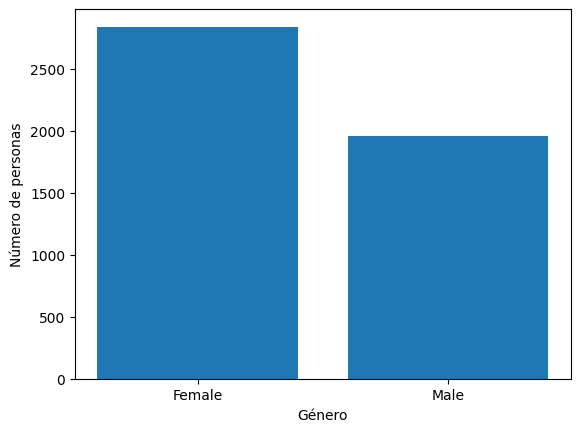

In [16]:
grafico_genero = data["gender"].value_counts()
plt.bar(grafico_genero.index, grafico_genero.values)
plt.xlabel("Género")
plt.ylabel("Número de personas")
plt.show()


In [17]:
data['gender'].value_counts()

Female    2842
Male      1957
Name: gender, dtype: int64

In [18]:
porcentajes = data['gender'].value_counts(normalize = True) * 100
porcentajes

Female    59.220671
Male      40.779329
Name: gender, dtype: float64

## age/edad

In [19]:
data['grupo_persona'] = pd.cut(data['age'], bins=[0, 17, 56, 89], labels=['niño', 'adulto', 'adulto mayor'])

In [20]:
data['age'].value_counts()

78.0    93
57.0    93
52.0    85
54.0    84
51.0    83
        ..
4.0     34
10.0    34
7.0     31
6.0     23
1.0      5
Name: age, Length: 82, dtype: int64

In [21]:
filtro_edad = data['age'] < 1
ninos_menores_a_1 = filtro_edad.sum()
ninos_menores_a_1

0

In [22]:
edad_minima = data['age'].min()
edad_maxima = data['age'].max()
print (edad_minima)
print (edad_maxima)


1.0
82.0


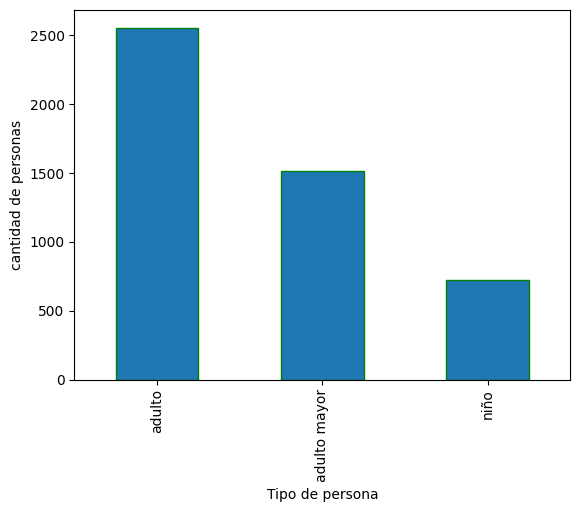

In [23]:
grafico_grupo_persona = data['grupo_persona'].value_counts()
grafico_grupo_persona.plot(kind='bar', edgecolor='green')
plt.xlabel('Tipo de persona')
plt.ylabel('cantidad de personas')
plt.show()


In [24]:
data['grupo_persona'].value_counts()

adulto          2557
adulto mayor    1515
niño             727
Name: grupo_persona, dtype: int64

In [25]:
porcentajes = data['grupo_persona'].value_counts(normalize = True) * 100
porcentajes

adulto          53.281934
adulto mayor    31.569077
niño            15.148989
Name: grupo_persona, dtype: float64

## hypertension/hipertension

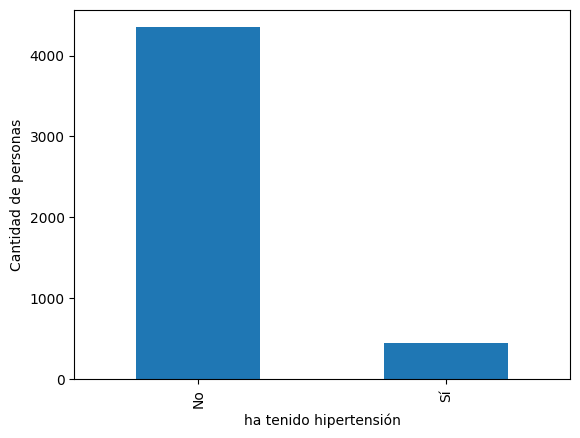

In [26]:
contador = data['hypertension'].value_counts()
ax = contador.plot.bar()
ax.set_xticklabels(['No', 'Sí'])
ax.set_xlabel('ha tenido hipertensión')
ax.set_ylabel('Cantidad de personas')
plt.show()

In [27]:
data['hypertension'].value_counts()

0    4348
1     451
Name: hypertension, dtype: int64

In [28]:
porcentajes = data['hypertension'].value_counts(normalize = True) * 100
porcentajes

0    90.602209
1     9.397791
Name: hypertension, dtype: float64

## heart_disease/ problemas del corazon

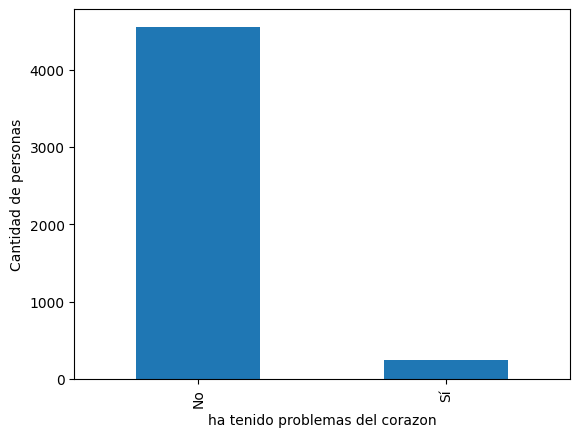

In [29]:
contador = data['heart_disease'].value_counts()
ax = contador.plot.bar()
ax.set_xticklabels(['No', 'Sí'])
ax.set_xlabel('ha tenido problemas del corazon')
ax.set_ylabel('Cantidad de personas')
plt.show()

In [30]:
data['heart_disease'].value_counts()

0    4556
1     243
Name: heart_disease, dtype: int64

In [31]:
porcentajes = data['heart_disease'].value_counts(normalize = True) * 100
porcentajes

0    94.936445
1     5.063555
Name: heart_disease, dtype: float64

## work_type/tipo de trabajo

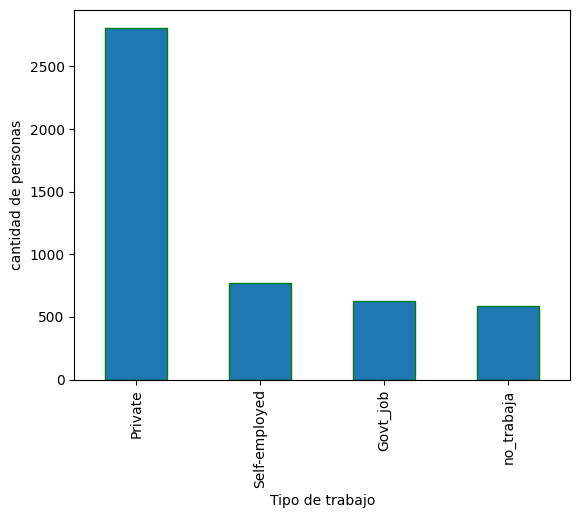

In [32]:
grafico_trabajo = data['work_type'].value_counts()
grafico_trabajo.plot(kind='bar', edgecolor='green')
plt.xlabel('Tipo de trabajo')
plt.ylabel('cantidad de personas')
plt.show()

In [33]:
data['work_type'].value_counts()

Private          2810
Self-employed     775
Govt_job          630
no_trabaja        584
Name: work_type, dtype: int64

In [34]:
porcentajes = data['work_type'].value_counts(normalize = True) * 100
porcentajes

Private          58.553865
Self-employed    16.149198
Govt_job         13.127735
no_trabaja       12.169202
Name: work_type, dtype: float64

## Residence_type/ tipo de vivienda

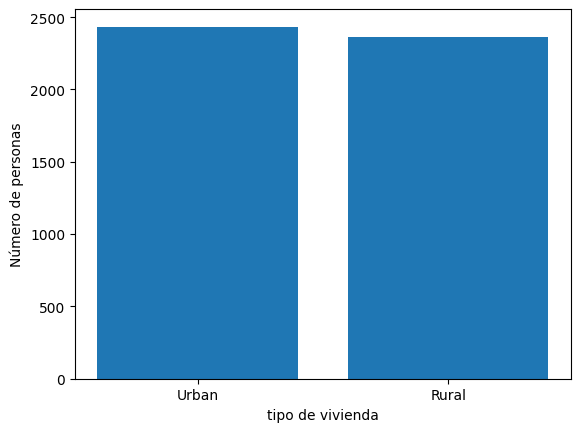

In [35]:
grafico_vivienda = data["Residence_type"].value_counts()
plt.bar(grafico_vivienda.index, grafico_vivienda.values)
plt.xlabel("tipo de vivienda")
plt.ylabel("Número de personas")
plt.show()

In [36]:
data['Residence_type'].value_counts()

Urban    2434
Rural    2365
Name: Residence_type, dtype: int64

In [37]:
porcentajes = data['Residence_type'].value_counts(normalize = True) * 100
porcentajes

Urban    50.7189
Rural    49.2811
Name: Residence_type, dtype: float64

## smoking_status/ estatus de viva de fumador 

In [38]:
data['smoking_status'].value_counts()

never smoked       1852
Unknown            1374
formerly smoked     836
smokes              737
Name: smoking_status, dtype: int64

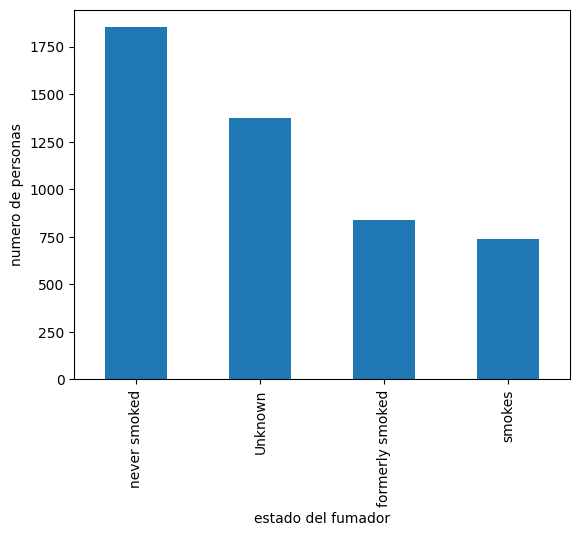

In [39]:
grafico_de_fumador = data['smoking_status'].value_counts()
ax = grafico_de_fumador.plot.bar()
ax.set_xlabel('estado del fumador')
ax.set_ylabel('numero de personas')
plt.show()

In [40]:
porcentajes = data['smoking_status'].value_counts(normalize = True) * 100
porcentajes

never smoked       38.591373
Unknown            28.630965
formerly smoked    17.420296
smokes             15.357366
Name: smoking_status, dtype: float64

In [41]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,grupo_persona
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,adulto mayor
1,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,adulto mayor
2,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,adulto
3,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,adulto mayor
4,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,adulto mayor
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4904,14180,Female,13.0,0,0,No,no_trabaja,Rural,103.08,18.6,Unknown,0,niño
4905,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,adulto mayor
4906,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,adulto
4907,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,adulto


In [42]:
bmi_minima = data['bmi'].min()
bmi_maxima = data['bmi'].max()
print (bmi_minima)
print (bmi_maxima)

11.3
97.6


In [43]:
data['sobrepeso'] = data.apply(lambda x: 'no' if
    (x['gender']=='Male'   and x['grupo_persona']=='niño'         and x['bmi']<=22.1) or
    (x['gender']=='Male'   and x['grupo_persona']=='adulto'       and x['bmi']<=26.7) or
    (x['gender']=='Male'   and x['grupo_persona']=='adulto mayor' and x['bmi']<=26)   or
    (x['gender']=='Female' and x['grupo_persona']=='niño'         and x['bmi']<=22.1) or
    (x['gender']=='Female' and x['grupo_persona']=='adulto'       and x['bmi']<=24.5) or
    (x['gender']=='Female' and x['grupo_persona']=='adulto mayor' and x['bmi']<=25.2)
    else 'si', axis=1)

In [44]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,grupo_persona,sobrepeso
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,adulto mayor,si
1,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,adulto mayor,si
2,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,adulto,si
3,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,adulto mayor,no
4,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,adulto mayor,si
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4904,14180,Female,13.0,0,0,No,no_trabaja,Rural,103.08,18.6,Unknown,0,niño,no
4905,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,adulto mayor,si
4906,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,adulto,si
4907,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,adulto,no


## sobre peso

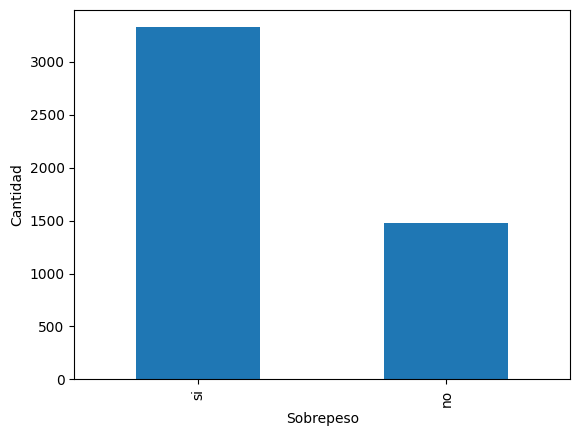

In [45]:
grafico_sobrepeso = data['sobrepeso'].value_counts()
grafico_sobrepeso.plot.bar()
plt.xlabel('Sobrepeso')
plt.ylabel('Cantidad')
plt.show()

In [46]:
data['sobrepeso'].value_counts()

si    3322
no    1477
Name: sobrepeso, dtype: int64

In [47]:
porcentajes = data['sobrepeso'].value_counts(normalize = True) * 100
porcentajes

si    69.222755
no    30.777245
Name: sobrepeso, dtype: float64

## posible diabetes

In [48]:
data['posible_diabetes'] = data.apply(lambda x: 'no' if
    (x['grupo_persona']=='niño'                  and x['avg_glucose_level']<=130) or
    (x['grupo_persona']=='adulto'                and x['avg_glucose_level']<=130) or
    (x['grupo_persona']=='adulto mayor'          and x['avg_glucose_level']<=180)  
    else 'si', axis=1)

In [49]:
data['posible_diabetes'].value_counts()

no    4048
si     751
Name: posible_diabetes, dtype: int64

In [50]:
porcentajes = data['posible_diabetes'].value_counts(normalize = True) * 100
porcentajes

no    84.350906
si    15.649094
Name: posible_diabetes, dtype: float64

In [51]:
data


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,grupo_persona,sobrepeso,posible_diabetes
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,adulto mayor,si,si
1,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,adulto mayor,si,no
2,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,adulto,si,si
3,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,adulto mayor,no,no
4,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,adulto mayor,si,si
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4904,14180,Female,13.0,0,0,No,no_trabaja,Rural,103.08,18.6,Unknown,0,niño,no,no
4905,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,adulto mayor,si,no
4906,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,adulto,si,no
4907,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,adulto,no,si


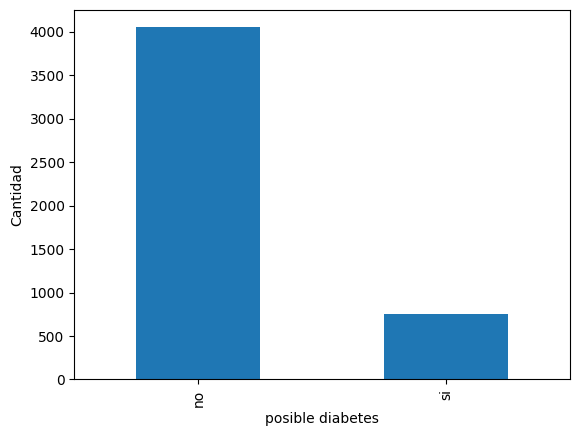

In [52]:
grafico_diabetes = data['posible_diabetes'].value_counts()
grafico_diabetes.plot.bar()
plt.xlabel('posible diabetes')
plt.ylabel('Cantidad')
plt.show()

In [53]:
data.info


<bound method DataFrame.info of          id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     31112    Male  80.0             0              1          Yes   
2     60182  Female  49.0             0              0          Yes   
3      1665  Female  79.0             1              0          Yes   
4     56669    Male  81.0             0              0          Yes   
...     ...     ...   ...           ...            ...          ...   
4904  14180  Female  13.0             0              0           No   
4905  44873  Female  81.0             0              0          Yes   
4906  19723  Female  35.0             0              0          Yes   
4907  37544    Male  51.0             0              0          Yes   
4908  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban 

In [54]:
data['posible_diabetes'].describe()

count     4799
unique       2
top         no
freq      4048
Name: posible_diabetes, dtype: object

In [58]:
data.rename( columns = {'stroke':'y_stroke'} , inplace = True)

In [59]:
data


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,y_stroke,grupo_persona,sobrepeso,posible_diabetes
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,adulto mayor,si,si
1,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,adulto mayor,si,no
2,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,adulto,si,si
3,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,adulto mayor,no,no
4,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,adulto mayor,si,si
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4904,14180,Female,13.0,0,0,No,no_trabaja,Rural,103.08,18.6,Unknown,0,niño,no,no
4905,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,adulto mayor,si,no
4906,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,adulto,si,no
4907,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,adulto,no,si


In [61]:
data = data.rename(columns=lambda x: 'X_' + x if x != 'y_stroke' else x)

In [62]:
data

,X_id,X_gender,X_age,X_hypertension,X_heart_disease,X_ever_married,X_work_type,X_Residence_type,X_avg_glucose_level,X_bmi,X_smoking_status,y_stroke,X_grupo_persona,X_sobrepeso,X_posible_diabetes
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,adulto mayor,si,si
1,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,adulto mayor,si,no
2,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,adulto,si,si
3,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,adulto mayor,no,no
4,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,adulto mayor,si,si
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4904,14180,Female,13.0,0,0,No,no_trabaja,Rural,103.08,18.6,Unknown,0,niño,no,no
4905,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,adulto mayor,si,no
4906,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,adulto,si,no
4907,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,adulto,no,si


In [74]:
data_2 = data[['X_id']].drop_duplicates().reset_index(drop=True)

In [77]:
data_2['X_id'] = sorted( data_2['X_id'].astype(int) )

In [79]:
data_2['ancla'] = data_2.index + 1

In [80]:
data_2

,X_id,ancla
0,77,1
1,84,2
2,91,3
3,99,4
4,129,5
...,...,...
4794,72911,4795
4795,72914,4796
4796,72915,4797
4797,72918,4798
